In [ ]:
# importing required libraries
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [ ]:
column_names = ["id",  "Clump Thickness", "Uniformity of Cell Size","Uniformity of Cell Shape", 
                                  "Marginal Adhesion", "Single Epithelial Cell Size","Bare Nuclei", "Bland Chromatin",
                                  "Normal Nucleoli", "Mitoses", "Class"]
dataset = pd.read_csv("breast-cancer-wisconsin.data", 
                       names = column_names)

In [ ]:
# checking for any missing values in the columns
for x in column_names: 
    print(dataset[x].count())

699
699
699
699
699
699
699
699
699
699
699


In [ ]:
# Printing total number of unique elements in each column
for x in column_names: 
    print(dataset[x].nunique())

645
10
10
10
10
10
11
10
10
9
2


### Splitting the dataset into the Training set and Test set
The ‘bare nuclei’ column is dropped due to format issues.

In [ ]:
X = dataset.drop(['id','Bare Nuclei','Class'], axis=1)
y = dataset['Class']
print(y.head())
X.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64


Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal Adhesion  Single Epithelial Cell Size  Bland Chromatin  \
0                  1                            2                3   
1                  5                            7                3   
2                  1                            2                3   
3                  1                            3                3   
4                  3                            2                3   

   Normal Nucleoli  Mitoses  
0                1        1  
1                2        1  
2                1        1  
3                7        1  
4                1        1

In [ ]:
# normalize the data to have a mean of 0 and std deviation of 1 (standard normal distribution)
# normalize by subtracting raw scores from mean and dividing by std deviation (z-score)
normalized_data = (X - np.mean(X)) / np.std(X)
normalized_data.head()

Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0         0.206936                -0.699995                 -0.743299   
1         0.206936                 0.283845                  0.266875   
2        -0.503866                -0.699995                 -0.743299   
3         0.562336                 1.595632                  1.613773   
4        -0.148465                -0.699995                 -0.743299   

   Marginal Adhesion  Single Epithelial Cell Size  Bland Chromatin  \
0          -0.633247                    -0.549561        -0.179662   
1           0.768621                     1.710106        -0.179662   
2          -0.633247                    -0.549561        -0.179662   
3          -0.633247                    -0.097628        -0.179662   
4           0.067687                    -0.549561        -0.179662   

   Normal Nucleoli   Mitoses  
0        -0.611825 -0.343912  
1        -0.284112 -0.343912  
2        -0.611825 -0.343912  
3         1.354454 -0.343912  
4        -0.611825 -0.343912

2    458
4    241
Name: Class, dtype: int64


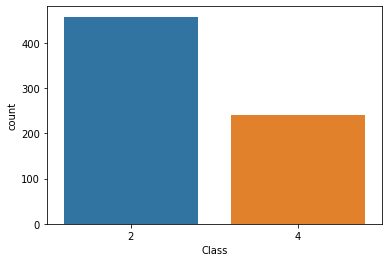

In [ ]:
#2 for benign and 4 for malignant
print(dataset['Class'].value_counts())
sns.countplot(dataset['Class'], label = "Count") 

In [ ]:
# split data into training and test features and labels using 20% of data as validation/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(559, 8) (559,)
(140, 8) (140,)


### Cross Validatation and Grid Search

In [ ]:
# function SVC_param_selection that optimizes combination of degree and C hyperparameters using an SVC with a polynomial kernel

def SVC_param_selection(X, y, nfolds):
    """ When using a SVM with a polynomial kernel there are two hyperparameters to tune. The value of C and 
    the degree of the polynomial, d. This function, SVC_param_selection will find the optimal pair of (C, degree)
    that gives the best results on a test set using sklearn's GridSearchCV (cross validation) method."""
    #penalty hyperparameter
    Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
    #degrees of polynomial kernel of svc
    degrees = [1, 2, 3, 4, 5]
    #initializing the paremeter grid as dictionary
    param_grid = {'C': Cs, 'degree' : degrees}
    #initialize search for best parameters using input nfold cross validation
    search = GridSearchCV(svm.SVC(kernel='poly'), param_grid, cv=nfolds)
    #fit input training data
    search.fit(X, y)
    return search

In [ ]:
#five-fold cross-validated
search = SVC_param_selection(X_train, y_train, 5)

In [ ]:
Y_predicted = search.predict( X_test )  

In [ ]:
#accuracy and classification report
print("Accuracy Score: ", accuracy_score(y_test, Y_predicted))
print(classification_report(y_test, Y_predicted))
#accuracy with five-fold cross validation and grid search

Accuracy Score:  0.9642857142857143
              precision    recall  f1-score   support

           2       0.99      0.96      0.97        90
           4       0.92      0.98      0.95        50

    accuracy                           0.96       140
   macro avg       0.96      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140



In [ ]:
search.best_params_

{'C': 1, 'degree': 1}

The nested for loop below gathers all of the training and test accuracies (as lists) produced by each combination of hyperparameters C and d for the polynomial kernel svc.

In [ ]:
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
degrees = [1, 2, 3, 4, 5]

train_acc = []
test_acc = []

for d in degrees:
    for c in Cs:
        #print("C = ", c, ", degree = ", d)
        svc = svm.SVC(C=c, degree=d, kernel='poly')
        svc.fit(X_train, y_train)
        #print(svc.score(X_train, y_train))
        train_acc.append((svc.score(X_train, y_train)))
        #print((svc.score(X_test, y_test)))
        test_acc.append((svc.score(X_test, y_test)))
print(max(test_acc))

0.9785714285714285


### Heat Map of Test Accuracies

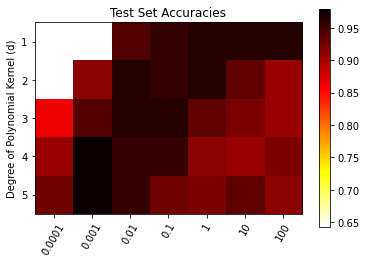

In [ ]:
acc_img = np.array(test_acc).reshape(len(degrees), len(Cs))

# plotting heatmap of accuracies
plt.imshow(acc_img, cmap=plt.cm.hot_r)
plt.colorbar()
plt.title('Test Set Accuracies')
plt.xticks(np.arange(len(Cs)), Cs, rotation=60)
plt.yticks(np.arange(len(degrees)), degrees)
plt.ylabel('Degree of Polynomial Kernel (d)');

### Checking with only SVC

In [ ]:
SVC_poly = svm.SVC(C=.1, degree=1, kernel='poly')
SVC_poly.fit(X_train, y_train)
SVC_poly.score(X_test, y_test)

0.9571428571428572

In [ ]:
#summary of prediction results
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, SVC_poly.predict(X_test))
conf_matrix

array([[86,  4],
       [ 2, 48]])